# Making data ready for preprocessing


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("../derived/final_stats_data.csv",low_memory=False)

In [3]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'City', 'Date', 'Season',
       'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision',
       'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2',
       'BowlingTeam', 'batter_matches_played', 'runs_scored', 'dismissals',
       'balls_faced', '0s_scored', '1s_scored', '2s_scored', '4s_scored',
       '6s_scored', 'high_score', '25_scored', '50_scored', '75_scored',
       '100_scored', 'strike_rate_x', 'batting_average', 'notout',
       'explosivity_rating', '0_wickets_taken', '1_wickets_taken',
       '2_wickets_taken', '3_wickets_taken', '4_wickets_taken',
       '5_wickets_taken', '6_wickets_taken', 'bowler_matches_played',
       

In [4]:
df.drop(['ID','non-striker', 'extra_type',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'City', 'Date', 'Season',
       'MatchNumber','SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2','Team1', 'Team2', 'extras_run','batsman_run'], axis = 1, inplace = True)

Preprocessing the data such that there is no NaN values


In [6]:
df.describe()

c:\Users\ADMIN\Desktop\ActualMajor\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ADMIN\Desktop\ActualMajor\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ADMIN\Desktop\ActualMajor\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,innings,overs,ballnumber,total_run,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,...,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded
count,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.00000,222746.000000,222746.000000,222746.000000,...,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,2.227460e+05,2.227460e+05,222746.000000,222746.000000
mean,1.485625,9.213678,3.619477,1.309334,94.983829,2426.517078,80.19014,1845.506514,737.899666,722.235416,...,158.444147,65.493405,601.053487,551.867427,93.830659,49.039480,inf,inf,7.696513,1877.000575
std,0.503205,5.683356,1.810382,1.604793,61.646833,1827.090746,53.81419,1373.054623,531.710476,561.231850,...,108.254827,46.866655,431.767837,422.356580,69.517741,8.098615,NaN,NaN,0.804558,1272.792496
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,4.000000,2.000000,0.000000,42.000000,903.000000,35.00000,668.000000,274.000000,244.000000,...,69.000000,28.000000,236.000000,221.000000,38.000000,45.000000,1.751304e+01,2.235354e+01,7.156289,796.000000
50%,1.000000,9.000000,4.000000,1.000000,88.000000,2178.000000,71.00000,1644.000000,655.000000,615.000000,...,136.000000,57.000000,487.000000,479.000000,84.000000,50.000000,1.962791e+01,2.489333e+01,7.631068,1726.000000
75%,2.000000,14.000000,5.000000,1.000000,144.000000,3819.000000,123.00000,2825.000000,1105.000000,1079.000000,...,255.000000,88.000000,912.000000,748.000000,127.000000,55.000000,2.222727e+01,2.862500e+01,8.150943,2735.000000
max,6.000000,19.000000,10.000000,7.000000,221.000000,6462.000000,203.00000,5049.000000,1910.000000,2159.000000,...,423.000000,176.000000,1551.000000,1750.000000,269.000000,69.000000,inf,inf,36.000000,4451.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222746 entries, 0 to 222745
Data columns (total 51 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   innings                222746 non-null  int64  
 1   overs                  222746 non-null  int64  
 2   ballnumber             222746 non-null  int64  
 3   batter                 222746 non-null  object 
 4   bowler                 222746 non-null  object 
 5   total_run              222746 non-null  int64  
 6   BattingTeam            222746 non-null  object 
 7   Venue                  222746 non-null  object 
 8   TossWinner             222746 non-null  object 
 9   TossDecision           222746 non-null  object 
 10  BowlingTeam            222746 non-null  object 
 11  batter_matches_played  222746 non-null  int64  
 12  runs_scored            222746 non-null  int64  
 13  dismissals             222746 non-null  int64  
 14  balls_faced            222746 non-nu

In [8]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a specific constant
df.fillna(value=0, inplace=True)  



In [11]:
df.shape

(222746, 1217)

In [10]:
#categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform on the training data
encoder.fit(df[['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision']])

# Transform batter and bowler columns to one-hot encoded representation
one_hot_encoded = encoder.transform(df[['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision']])

# Concatenate the one-hot encoded features with the original DataFrame
df = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision']))], axis=1)

# Drop the original 'batter' and 'bowler' columns
df = df.drop(['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision'], axis=1)

import joblib
joblib.dump(encoder, 'encoder.joblib')




c:\Users\ADMIN\Desktop\ActualMajor\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['encoder.joblib']

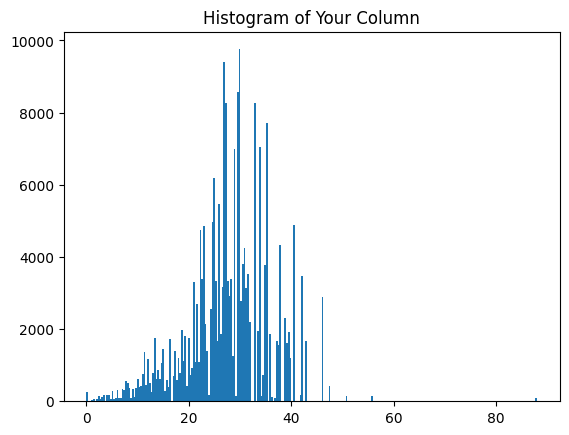

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['batting_average'], bins='auto')
plt.title('Histogram of Your Column')
plt.show()


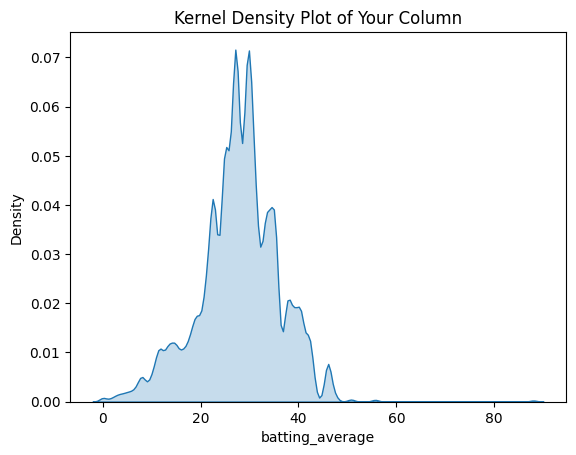

In [17]:
import seaborn as sns

sns.kdeplot(df['batting_average'], fill=True)
plt.title('Kernel Density Plot of Your Column')
plt.show()


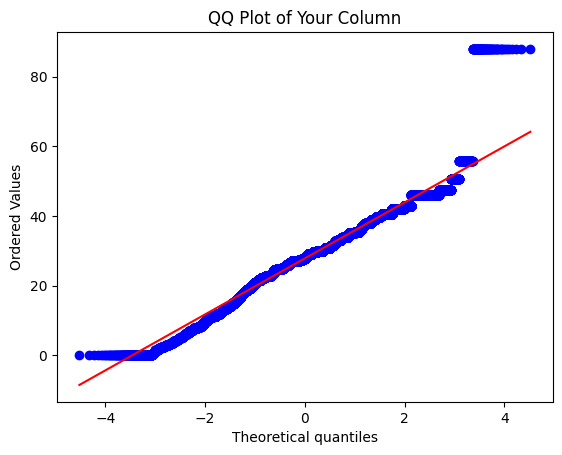

In [18]:
from scipy.stats import probplot

probplot(df['batting_average'], dist='norm', plot=plt)
plt.title('QQ Plot of Your Column')
plt.show()


In [6]:
# Feature scaling
scaler = StandardScaler()
numerical_columns = ['runs_scored','highest_conceded','total_runs_conceded','economy','strike_rate_x','explosivity_rating','bowling_average','batting_average','strike_rate_y']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [7]:
df[['bowling_average','batting_average','strike_rate_y']]

,bowling_average,batting_average,strike_rate_y
0,-0.284291,-0.495984,-0.512082
1,-0.284291,-0.495984,-0.512082
2,-0.284291,1.457484,-0.512082
3,-0.284291,-0.495984,-0.512082
4,-0.284291,-0.495984,-0.512082
...,...,...,...
222741,1.035991,-2.192559,1.187615
222742,1.035991,-3.054226,1.187615
222743,1.035991,-2.192559,1.187615
222744,-0.126490,-3.054226,-0.271887


In [8]:
# Define sequence length
sequence_length = 6

# Create sequences
sequences = []
for i in range(0,len(df) - sequence_length + 1):
    sequence = df.iloc[i:i + sequence_length]
    sequences.append(sequence)

In [9]:
sequences

[   innings  overs  ballnumber  total_run  batter_matches_played  runs_scored  \
 0        1      0           1          0                     23    -1.028696   
 1        1      0           2          1                     23    -1.028696   
 2        1      0           3          1                     79     0.169386   
 3        1      0           4          0                     23    -1.028696   
 4        1      0           5          0                     23    -1.028696   
 5        1      0           6          0                     23    -1.028696   
 
    dismissals  balls_faced  0s_scored  1s_scored  ...  \
 0          23          406      177.0      133.0  ...   
 1          23          406      177.0      133.0  ...   
 2          69         1849      761.0      615.0  ...   
 3          23          406      177.0      133.0  ...   
 4          23          406      177.0      133.0  ...   
 5          23          406      177.0      133.0  ...   
 
    TossWinner_Lucknow 

In [10]:
# Convert sequences to a 3D NumPy array
data = np.array([sequence[['overs'] + list(sequence.columns[3:])].values for sequence in sequences])
target = np.array([sequence['total_run'].values[-1] for sequence in sequences])


In [1]:


# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# Reduce dataset size (example: using the first 1000 samples)
X_train, X_test, y_train, y_test = train_test_split(data[:1000], target[:1000], test_size=0.2, random_state=42)


# Define a custom PyTorch dataset
class CricketDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

# Create DataLoader instances for training and testing
batch_size = 32
train_dataset = CricketDataset(X_train, y_train)
test_dataset = CricketDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


NameError: name 'train_test_split' is not defined

In [ ]:
X_train.shape

In [ ]:
import torch
import torch.nn as nn

class MyLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Extract the output of the last time step
        return out

# Define model dimensions
input_size = data.shape[2]  
hidden_size = 64  
output_size = 1  

# Create the model
model = MyLSTM(input_size, hidden_size, output_size)

In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

In [ ]:
num_epochs = 100  

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in train_loader: 
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        predictions = model(inputs)

    # Calculate evaluation metrics (e.g., Mean Squared Error)
    mse = nn.MSELoss()(predictions, labels)
print(mse)

In [ ]:
for inputs, labels in test_loader:
    print(inputs)
    break

In [ ]:
# Load the encoder
loaded_encoder = joblib.load('encoder.joblib')

# Prepare input for prediction
ball_input = pd.DataFrame({
    'overs': [19],
    'batter': ['V Kohli'],
    'bowler': ['Shakib Al Hasan'],
    'total_run': [50],  # Example value for 'total_run'
    'BattingTeam': ['Royal Challengers Bangalore'],
    'Venue': ['Bengaluru'],
    'TossWinner': ['Royal Challengers Bangalore'],
    'TossDecision': ['field'],
    'BowlingTeam': ['Kolkata Knight Riders'],
    'batter_matches_played': [100],  # Example value for 'batter_matches_played'
    'runs_scored': [25],
    'dismissals': [2],  # Example value for 'dismissals'
    'balls_faced': [30],  # Example value for 'balls_faced'
    '0s_scored': [5],  # Example value for '0s_scored'
    '1s_scored': [10],  # Example value for '1s_scored'
    '2s_scored': [30],  # Example value for '2s_scored'
    '4s_scored': [4],  # Example value for '4s_scored'
    '6s_scored': [2],  # Example value for '6s_scored'
    'high_score': [50],
    '25_scored': [1],  # Example value for '25_scored'
    '50_scored': [40],  # Example value for '50_scored'
    '75_scored': [20],  # Example value for '75_scored'
    '100_scored': [5],  # Example value for '100_scored'
    'strike_rate_x': [120.5],
    'batting_average': [35],  # Example value for 'batting_average'
    'notout': [1],  # Example value for 'notout'
    'explosivity_rating': [0.8],
    '0_wickets_taken': [10],  # Example value for '0_wickets_taken'
    '1_wickets_taken': [5],  # Example value for '1_wickets_taken'
    '2_wickets_taken': [3],  # Example value for '2_wickets_taken'
    '3_wickets_taken': [2],  # Example value for '3_wickets_taken'
    '4_wickets_taken': [1],  # Example value for '4_wickets_taken'
    '5_wickets_taken': [0],  # Example value for '5_wickets_taken'
    '6_wickets_taken': [0],  # Example value for '6_wickets_taken'
    'bowler_matches_played': [120],  # Example value for 'bowler_matches_played'
    'runs_conceded': [200],  # Example value for 'runs_conceded'
    'extras_runs_conceded': [5],  # Example value for 'extras_runs_conceded'
    'wickets_taken': [15],  # Example value for 'wickets_taken'
    'balls_bowled': [180],  # Example value for 'balls_bowled'
    '4s_conceded': [10],  # Example value for '4s_conceded'
    '6s_conceded': [5],  # Example value for '6s_conceded'
    '0s_conceded': [20],  # Example value for '0s_conceded'
    '1s_conceded': [30],  # Example value for '1s_conceded'
    '2s_conceded': [10],  # Example value for '2s_conceded'
    'highest_conceded': [40],  # Example value for 'highest_conceded'
    'strike_rate_y': [100],  # Example value for 'strike_rate_y'
    'bowling_average': [20],  # Example value for 'bowling_average'
    'economy': [10.2],
    'total_runs_conceded': [25000],  # Example value for 'total_runs_conceded'
})



scaler = StandardScaler()
numerical_columns = ['runs_scored','highest_conceded','total_runs_conceded','economy','strike_rate_x','explosivity_rating','bowling_average','batting_average','strike_rate_y']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Apply one-hot encoding using the loaded encoder
encoded_features = loaded_encoder.transform(ball_input[['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision']])

# Create a DataFrame for the encoded features with correct column names
encoded_columns = loaded_encoder.get_feature_names_out(['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision'])
ball_input_encoded = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the original numerical columns and the encoded categorical columns
ball_input_final = pd.concat([ball_input.drop(['batter', 'bowler','BattingTeam','BowlingTeam','Venue','TossWinner', 'TossDecision'], axis=1), ball_input_encoded], axis=1)

# Convert prediction input to PyTorch tensor
input_sequence = torch.tensor(ball_input_final.values, dtype=torch.float32)
input_sequence = input_sequence.unsqueeze(0)  # Add batch dimension



In [ ]:
model.eval()

# Forward pass to get the predicted output
with torch.no_grad():
    predicted_output = model(input_sequence)

# Convert the predicted output to a numpy array
predicted_output_np = predicted_output.numpy()


# Print or use the predicted output
rounded_predictions = np.round(predicted_output_np)

print("Predicted Output (Rounded):", rounded_predictions)
print(predicted_output_np)
